# Predicting Credit Card Approval

In [5]:
import pandas as pd

In [6]:
cc_approve = pd.read_csv('datasets/cc_approvals.data', header=None, names=['Gender', 'Age', 'Debt', 'Married', 'BankCustomer', 'EducationLevel', 'Ethnicity', 'YearsEmployed', 'PriorDefault', 'Employed', 'CreditScore', 'DriversLicense', 'Citizen', 'ZipCode', 'Income', 'ApprovalStatus'])

# Inspecting the dataset

In [7]:
cc_approve.head()

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,ApprovalStatus
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [8]:
cc_approve_description = cc_approve.describe()
print(cc_approve_description) #Summary Statistics

             Debt  YearsEmployed  CreditScore         Income
count  690.000000     690.000000    690.00000     690.000000
mean     4.758725       2.223406      2.40000    1017.385507
std      4.978163       3.346513      4.86294    5210.102598
min      0.000000       0.000000      0.00000       0.000000
25%      1.000000       0.165000      0.00000       0.000000
50%      2.750000       1.000000      0.00000       5.000000
75%      7.207500       2.625000      3.00000     395.500000
max     28.000000      28.500000     67.00000  100000.000000


In [9]:
cc_approve_info = cc_approve.info()
print(cc_approve_info) #DataFrame Info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
Gender            690 non-null object
Age               690 non-null object
Debt              690 non-null float64
Married           690 non-null object
BankCustomer      690 non-null object
EducationLevel    690 non-null object
Ethnicity         690 non-null object
YearsEmployed     690 non-null float64
PriorDefault      690 non-null object
Employed          690 non-null object
CreditScore       690 non-null int64
DriversLicense    690 non-null object
Citizen           690 non-null object
ZipCode           690 non-null object
Income            690 non-null int64
ApprovalStatus    690 non-null object
dtypes: float64(2), int64(2), object(12)
memory usage: 86.3+ KB
None


In [10]:
cc_approve.tail(17)

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,ApprovalStatus
673,?,29.50,2.000,y,p,e,h,2.000,f,f,0,f,g,00256,17,-
674,a,37.33,2.500,u,g,i,h,0.210,f,f,0,f,g,00260,246,-
675,a,41.58,1.040,u,g,aa,v,0.665,f,f,0,f,g,00240,237,-
676,a,30.58,10.665,u,g,q,h,0.085,f,t,12,t,g,00129,3,-
677,b,19.42,7.250,u,g,m,v,0.040,f,t,1,f,g,00100,1,-
678,a,17.92,10.210,u,g,ff,ff,0.000,f,f,0,f,g,00000,50,-
679,a,20.08,1.250,u,g,c,v,0.000,f,f,0,f,g,00000,0,-
680,b,19.50,0.290,u,g,k,v,0.290,f,f,0,f,g,00280,364,-
681,b,27.83,1.000,y,p,d,h,3.000,f,f,0,f,g,00176,537,-
682,b,17.08,3.290,u,g,i,v,0.335,f,f,0,t,g,00140,2,-


# Handling the missing values

In [11]:
import numpy as np

In [12]:
print(cc_approve.tail(17))

    Gender    Age    Debt Married BankCustomer EducationLevel Ethnicity  \
673      ?  29.50   2.000       y            p              e         h   
674      a  37.33   2.500       u            g              i         h   
675      a  41.58   1.040       u            g             aa         v   
676      a  30.58  10.665       u            g              q         h   
677      b  19.42   7.250       u            g              m         v   
678      a  17.92  10.210       u            g             ff        ff   
679      a  20.08   1.250       u            g              c         v   
680      b  19.50   0.290       u            g              k         v   
681      b  27.83   1.000       y            p              d         h   
682      b  17.08   3.290       u            g              i         v   
683      b  36.42   0.750       y            p              d         v   
684      b  40.58   3.290       u            g              m         v   
685      b  21.08  10.085

In [13]:
cc_approve = cc_approve.replace('?', np.NaN) #Replace ? with Nan

In [14]:
cc_approve.tail(17)

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,ApprovalStatus
673,NaN,29.50,2.000,y,p,e,h,2.000,f,f,0,f,g,00256,17,-
674,a,37.33,2.500,u,g,i,h,0.210,f,f,0,f,g,00260,246,-
675,a,41.58,1.040,u,g,aa,v,0.665,f,f,0,f,g,00240,237,-
676,a,30.58,10.665,u,g,q,h,0.085,f,t,12,t,g,00129,3,-
677,b,19.42,7.250,u,g,m,v,0.040,f,t,1,f,g,00100,1,-
678,a,17.92,10.210,u,g,ff,ff,0.000,f,f,0,f,g,00000,50,-
679,a,20.08,1.250,u,g,c,v,0.000,f,f,0,f,g,00000,0,-
680,b,19.50,0.290,u,g,k,v,0.290,f,f,0,f,g,00280,364,-
681,b,27.83,1.000,y,p,d,h,3.000,f,f,0,f,g,00176,537,-
682,b,17.08,3.290,u,g,i,v,0.335,f,f,0,t,g,00140,2,-


In [15]:
cc_approve['Age'] = pd.to_numeric(cc_approve['Age'])

In [16]:
cc_approve.describe()

,Age,Debt,YearsEmployed,CreditScore,Income
count,678.000000,690.000000,690.000000,690.00000,690.000000
mean,31.568171,4.758725,2.223406,2.40000,1017.385507
std,11.957862,4.978163,3.346513,4.86294,5210.102598
min,13.750000,0.000000,0.000000,0.00000,0.000000
25%,22.602500,1.000000,0.165000,0.00000,0.000000
50%,28.460000,2.750000,1.000000,0.00000,5.000000
75%,38.230000,7.207500,2.625000,3.00000,395.500000
max,80.250000,28.000000,28.500000,67.00000,100000.000000


In [17]:
cc_approve.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
Gender            678 non-null object
Age               678 non-null float64
Debt              690 non-null float64
Married           684 non-null object
BankCustomer      684 non-null object
EducationLevel    681 non-null object
Ethnicity         681 non-null object
YearsEmployed     690 non-null float64
PriorDefault      690 non-null object
Employed          690 non-null object
CreditScore       690 non-null int64
DriversLicense    690 non-null object
Citizen           690 non-null object
ZipCode           677 non-null object
Income            690 non-null int64
ApprovalStatus    690 non-null object
dtypes: float64(3), int64(2), object(11)
memory usage: 86.3+ KB


In [18]:
cc_approve.isnull().sum()

Gender            12
Age               12
Debt               0
Married            6
BankCustomer       6
EducationLevel     9
Ethnicity          9
YearsEmployed      0
PriorDefault       0
Employed           0
CreditScore        0
DriversLicense     0
Citizen            0
ZipCode           13
Income             0
ApprovalStatus     0
dtype: int64

In [19]:
print('NaN Values: ', cc_approve.isnull().values.sum())

NaN Values:  67


In [20]:
#Mean imputation
cc_approve = cc_approve.fillna(value=cc_approve.mean(), inplace=True)
print('NaN Values: ',cc_approve.isnull().values.sum())
cc_approve

NaN Values:  55


,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,ApprovalStatus
0,b,30.83,0.000,u,g,w,v,1.250,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.040,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.500,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.750,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.710,t,f,0,f,s,00120,0,+
5,b,32.08,4.000,u,g,m,v,2.500,t,f,0,t,g,00360,0,+
6,b,33.17,1.040,u,g,r,h,6.500,t,f,0,t,g,00164,31285,+
7,a,22.92,11.585,u,g,cc,v,0.040,t,f,0,f,g,00080,1349,+
8,b,54.42,0.500,y,p,k,h,3.960,t,f,0,f,g,00180,314,+
9,b,42.50,4.915,y,p,w,v,3.165,t,f,0,t,g,00052,1442,+


In [21]:
cc_approve.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
Gender            678 non-null object
Age               690 non-null float64
Debt              690 non-null float64
Married           684 non-null object
BankCustomer      684 non-null object
EducationLevel    681 non-null object
Ethnicity         681 non-null object
YearsEmployed     690 non-null float64
PriorDefault      690 non-null object
Employed          690 non-null object
CreditScore       690 non-null int64
DriversLicense    690 non-null object
Citizen           690 non-null object
ZipCode           677 non-null object
Income            690 non-null int64
ApprovalStatus    690 non-null object
dtypes: float64(3), int64(2), object(11)
memory usage: 86.3+ KB


In [22]:
cc_approve.describe()

,Age,Debt,YearsEmployed,CreditScore,Income
count,690.000000,690.000000,690.000000,690.00000,690.000000
mean,31.568171,4.758725,2.223406,2.40000,1017.385507
std,11.853273,4.978163,3.346513,4.86294,5210.102598
min,13.750000,0.000000,0.000000,0.00000,0.000000
25%,22.670000,1.000000,0.165000,0.00000,0.000000
50%,28.625000,2.750000,1.000000,0.00000,5.000000
75%,37.707500,7.207500,2.625000,3.00000,395.500000
max,80.250000,28.000000,28.500000,67.00000,100000.000000


In [23]:
cc_approve

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,ApprovalStatus
0,b,30.83,0.000,u,g,w,v,1.250,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.040,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.500,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.750,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.710,t,f,0,f,s,00120,0,+
5,b,32.08,4.000,u,g,m,v,2.500,t,f,0,t,g,00360,0,+
6,b,33.17,1.040,u,g,r,h,6.500,t,f,0,t,g,00164,31285,+
7,a,22.92,11.585,u,g,cc,v,0.040,t,f,0,f,g,00080,1349,+
8,b,54.42,0.500,y,p,k,h,3.960,t,f,0,f,g,00180,314,+
9,b,42.50,4.915,y,p,w,v,3.165,t,f,0,t,g,00052,1442,+


In [24]:
for col in cc_approve:
    if cc_approve[col].dtypes == 'object':
        cc_approve[col] = cc_approve[col].fillna(value=cc_approve[col].value_counts().index[0])
        
print('NaN Values: ', cc_approve.isnull().values.sum())

NaN Values:  0


In [25]:
cc_approve.tail(17)

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,ApprovalStatus
673,b,29.50,2.000,y,p,e,h,2.000,f,f,0,f,g,00256,17,-
674,a,37.33,2.500,u,g,i,h,0.210,f,f,0,f,g,00260,246,-
675,a,41.58,1.040,u,g,aa,v,0.665,f,f,0,f,g,00240,237,-
676,a,30.58,10.665,u,g,q,h,0.085,f,t,12,t,g,00129,3,-
677,b,19.42,7.250,u,g,m,v,0.040,f,t,1,f,g,00100,1,-
678,a,17.92,10.210,u,g,ff,ff,0.000,f,f,0,f,g,00000,50,-
679,a,20.08,1.250,u,g,c,v,0.000,f,f,0,f,g,00000,0,-
680,b,19.50,0.290,u,g,k,v,0.290,f,f,0,f,g,00280,364,-
681,b,27.83,1.000,y,p,d,h,3.000,f,f,0,f,g,00176,537,-
682,b,17.08,3.290,u,g,i,v,0.335,f,f,0,t,g,00140,2,-


# Some Exploratory data analysis

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

In [27]:
import seaborn as sns

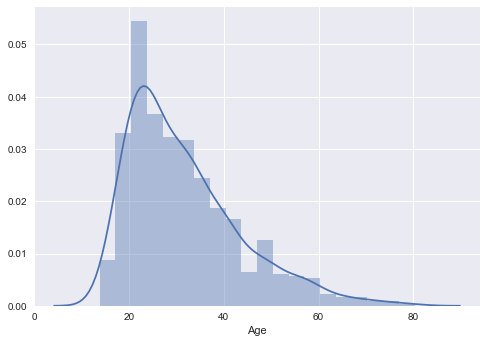

In [28]:
sns.distplot(cc_approve['Age'])

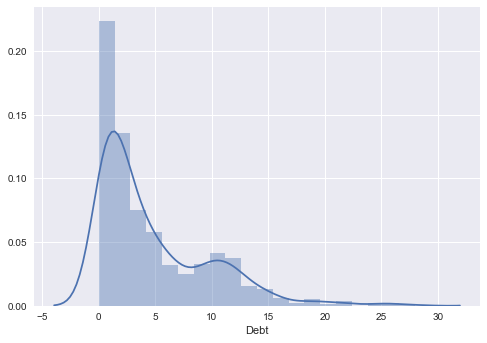

In [29]:
sns.distplot(cc_approve['Debt'])

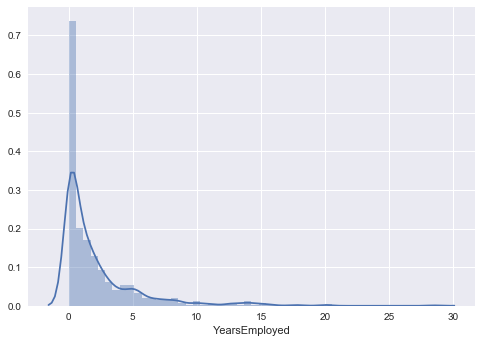

In [30]:
sns.distplot(cc_approve['YearsEmployed'])

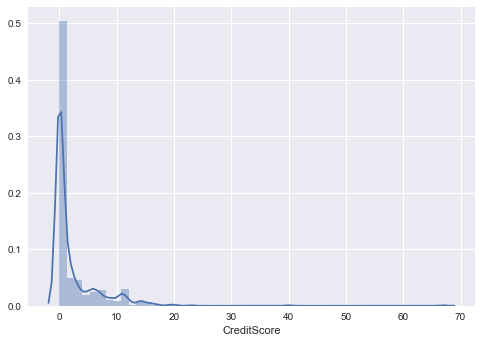

In [31]:
sns.distplot(cc_approve['CreditScore'])

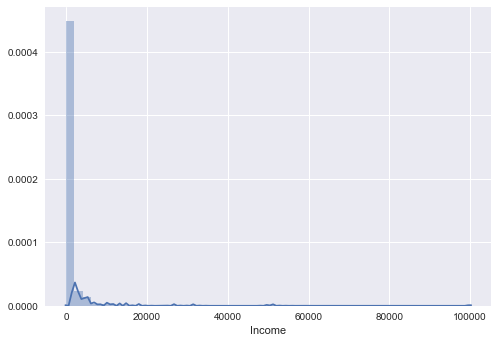

In [32]:
sns.distplot(cc_approve['Income'])

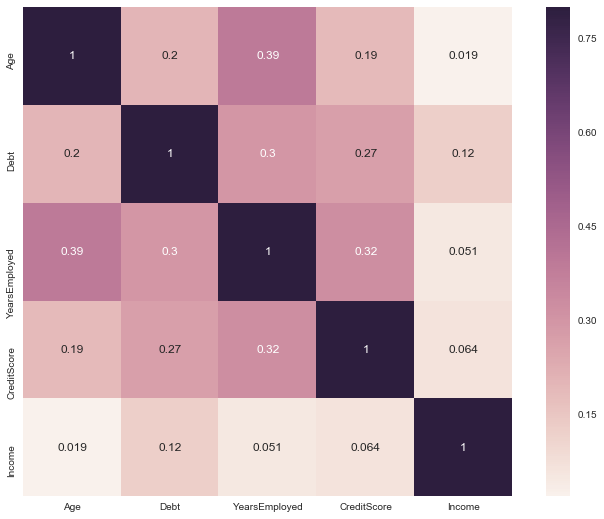

In [33]:
corrmatrix = cc_approve.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmatrix, vmax=.8, square=True, annot=True)

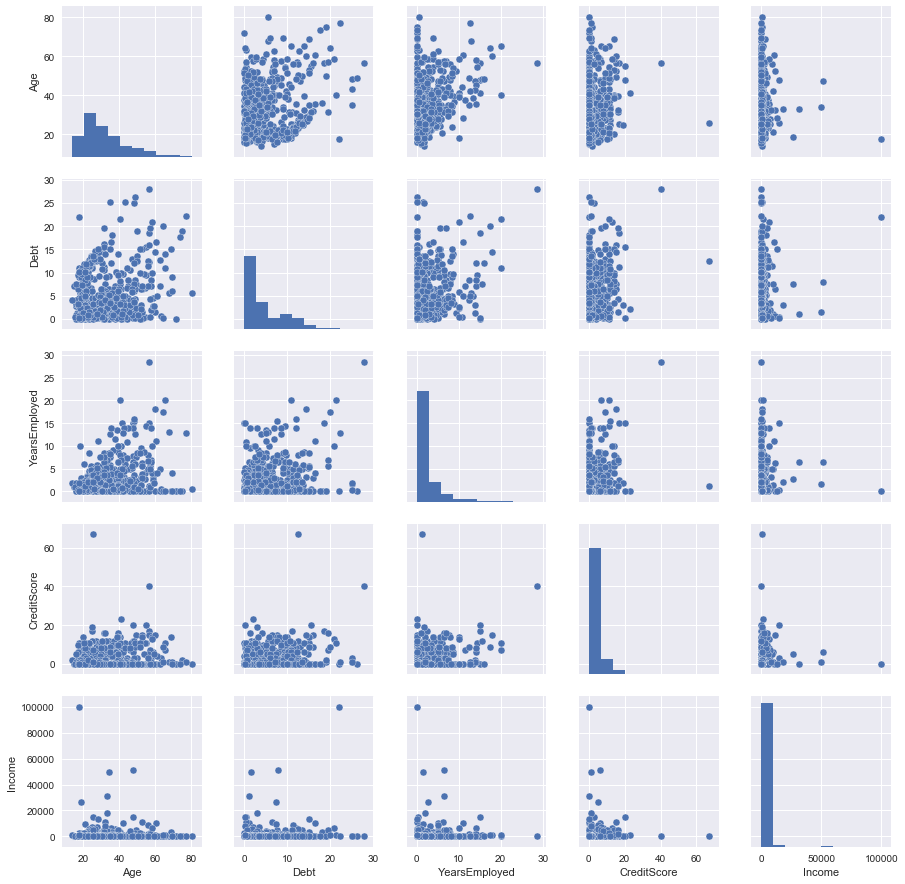

In [34]:
col = ['Age', 'Debt', 'YearsEmployed', 'CreditScore', 'Income']
sns.pairplot(cc_approve[col])

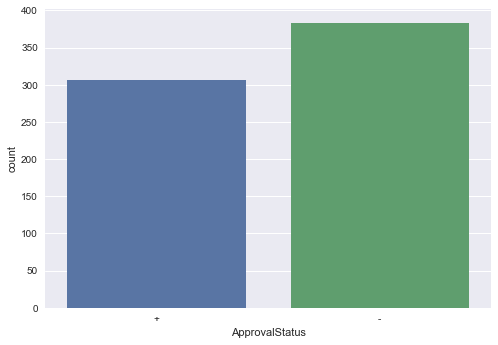

In [35]:
sns.countplot(x='ApprovalStatus', data=cc_approve)

# Convert the non-numeric data into numeric.

In [36]:
from sklearn.preprocessing import LabelEncoder

In [37]:
le = LabelEncoder()

In [38]:
cc_approve.head()

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,ApprovalStatus
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [39]:
# Numeric Transformation
for col in cc_approve:
    if cc_approve[col].dtypes == 'object':
        cc_approve[col] = le.fit_transform(cc_approve[col])

In [40]:
cc_approve.tail(20)

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,ApprovalStatus
670,1,47.17,5.835,1,0,12,7,5.500,0,0,0,0,0,145,150,1
671,1,25.83,12.835,1,0,2,7,0.500,0,0,0,0,0,0,2,1
672,0,50.25,0.835,1,0,0,7,0.500,0,0,0,1,0,84,117,1
673,1,29.50,2.000,2,2,4,3,2.000,0,0,0,0,0,89,17,1
674,0,37.33,2.500,1,0,6,3,0.210,0,0,0,0,0,90,246,1
675,0,41.58,1.040,1,0,0,7,0.665,0,0,0,0,0,84,237,1
676,0,30.58,10.665,1,0,10,3,0.085,0,1,12,1,0,40,3,1
677,1,19.42,7.250,1,0,9,7,0.040,0,1,1,0,0,31,1,1
678,0,17.92,10.210,1,0,5,2,0.000,0,0,0,0,0,0,50,1
679,0,20.08,1.250,1,0,1,7,0.000,0,0,0,0,0,0,0,1


# Split the data into train and test sets.

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
cc_approve = cc_approve.drop(['DriversLicense', 'ZipCode'], axis=1)
cc_approve = cc_approve.values

In [43]:
X,Y = cc_approve[:,0:13], cc_approve[:,13]

In [44]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=123)

# Scale the features

In [45]:
from sklearn.preprocessing import MinMaxScaler

In [46]:
scaler = MinMaxScaler(feature_range=(0, 1))

In [47]:
rescaledX_train = scaler.fit_transform(X_train)
rescaledX_test = scaler.transform(X_test)

## Fitting a logistic regression model to the train set

In [48]:
from sklearn.linear_model import LogisticRegression

In [49]:
classifier = LogisticRegression()

In [50]:
classifier.fit(rescaledX_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [51]:
Y_pred = classifier.predict(rescaledX_test)

# Making predictions and evaluating the model

In [52]:
from sklearn.metrics import confusion_matrix

In [53]:
cm = confusion_matrix(Y_test, Y_pred)

In [54]:
cm

array([[54,  8],
       [10, 66]])

In [55]:
print('Accuracy of logitic regression classifier: ', classifier.score(rescaledX_test, Y_test))

Accuracy of logitic regression classifier:  0.869565217391


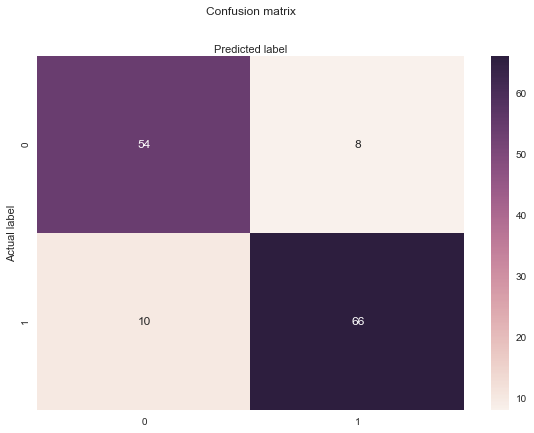

In [78]:
class_names = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

#heatmap
sns.heatmap(pd.DataFrame(cm), annot=True, fmt='g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [61]:
from sklearn import metrics

In [62]:
print('Precision: ', metrics.precision_score(Y_test, Y_pred))
print('Recall: ', metrics.recall_score(Y_test, Y_pred))

Precision:  0.891891891892
Recall:  0.868421052632


In [63]:
print(metrics.classification_report(Y_test, Y_pred))

             precision    recall  f1-score   support

        0.0       0.84      0.87      0.86        62
        1.0       0.89      0.87      0.88        76

avg / total       0.87      0.87      0.87       138

